# Database_TMDb_movie_data

### This dataset consist of one csv file that contain 21 columns like (imdb_id, popularity, budget, revenue, cast, oreginal_title, production_companies)


# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset as dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

This dataset has 21 columns and 10866 rows.

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# Drop unnecessary columns
df.drop(columns=['id','homepage','tagline', 'keywords', 'overview','release_date'], inplace= True)
df.shape

(10866, 15)

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10855 non-null  object 
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

In [8]:
df.isna().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df.dropna(inplace= True)
df.shape

(9770, 15)

In [10]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9770.000000,9.770000e+03,9.770000e+03,9770.000000,9770.000000,9770.000000,9770.000000,9.770000e+03,9.770000e+03
mean,0.694775,1.618298e+07,4.424026e+07,102.939611,239.353224,5.963388,2000.876766,1.941997e+07,5.706477e+07
std,1.037027,3.221320e+07,1.225998e+08,27.865500,603.066348,0.913207,13.037610,3.566891e+07,1.514632e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232620,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.179631e+05,0.000000e+00
75%,0.776465,1.936250e+07,3.105779e+07,112.000000,173.000000,6.600000,2011.000000,2.467646e+07,4.312856e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
df.tail()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000,0.0
10862,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000,0.0
10863,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000,0.0
10864,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000,0.0
10865,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,15,1.5,1966,127642.279154,0.0


In [13]:
# Split genres column to 5 columns
df[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5']] = df['genres'].str.split('|', expand= True)

I did that because genres column has more than one genre together so i split every genre in separate column

In [14]:
df[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5']].isna().sum()

genre_1       0
genre_2    1959
genre_3    5062
genre_4    7923
genre_5    9263
dtype: int64

The 5 genres columns one column has not null values and the last 4 columns have null values.

In [15]:
# drop columns that have null values
df.drop(columns=['genres', 'genre_2', 'genre_3', 'genre_4', 'genre_5'], inplace=True)

In [16]:
# Split production_campanies column to 5 columns
df[['production_company','company_2', 'company_3', 'company_4', 'company_5']] = df['production_companies'].str.split('|', expand= True)

I did that because production_companies column has more than one company together so i split every company in separate column

In [17]:
# Drop columns that have null values
df.drop(columns=['company_2', 'company_3', 'company_4', 'company_5'], inplace= True)##

In [18]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,production_company
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Village Roadshow Pictures
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Summit Entertainment
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Lucasfilm
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Universal Pictures


In [19]:
df.isna().sum()

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
genre_1                 0
production_company      0
dtype: int64

# data exploration

### Q1: Most directors have directed films

In [20]:
df_directors = df.groupby('director').count()
df_directors['imdb_id'].sort_values(ascending=False).head().index.tolist()

['Woody Allen',
 'Clint Eastwood',
 'Steven Spielberg',
 'Martin Scorsese',
 'Ridley Scott']

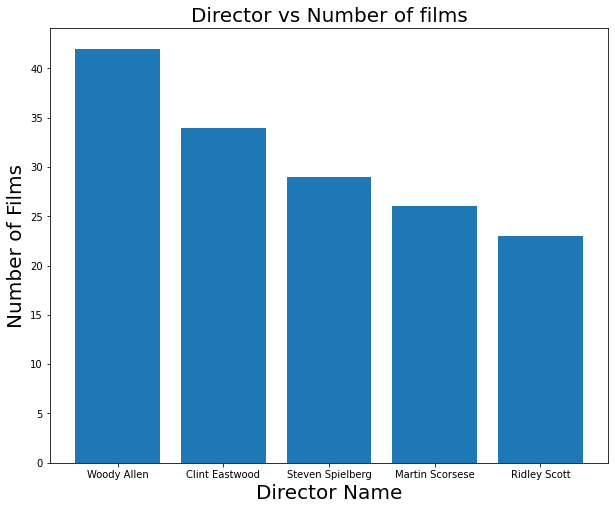

In [21]:
plt.figure(figsize=(10,8))
plt.bar(x = df_directors['imdb_id'].\
sort_values(ascending=False).head().index.tolist(), height= df_directors['imdb_id'].sort_values(ascending=False).head().tolist())
plt.title('Director vs Number of films',fontsize = 20)
plt.xlabel('Director Name',fontsize = 20)
plt.ylabel('Number of Films',fontsize = 20);

### The year in which the most films were produced?

In [22]:
df_years = df.groupby('release_year').count()


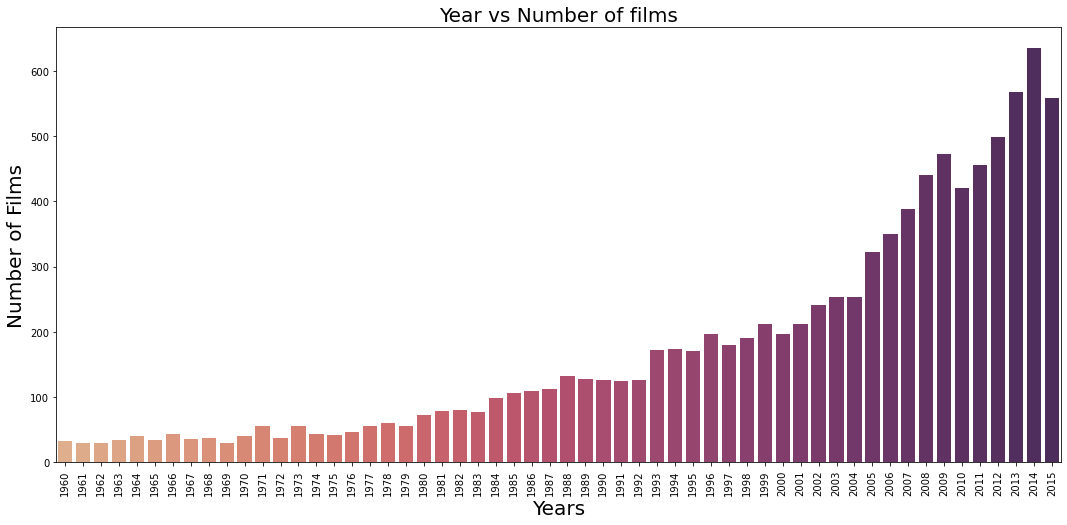

In [23]:
plt.figure(figsize=(18,8))
sns.barplot(x= df_years['imdb_id'].index.tolist(), y= df_years['imdb_id'].tolist(), palette='flare')
plt.xticks(rotation = 90)
plt.title('Year vs Number of films',fontsize = 20)
plt.xlabel('Years',fontsize = 20)
plt.ylabel('Number of Films',fontsize = 20);

The year that has highest directed films is 2014.

### The most genre film which produced?

In [24]:
df_genre = df.groupby('genre_1').count()
df_genre_imdb = df_genre['imdb_id'].sort_values(ascending= False)

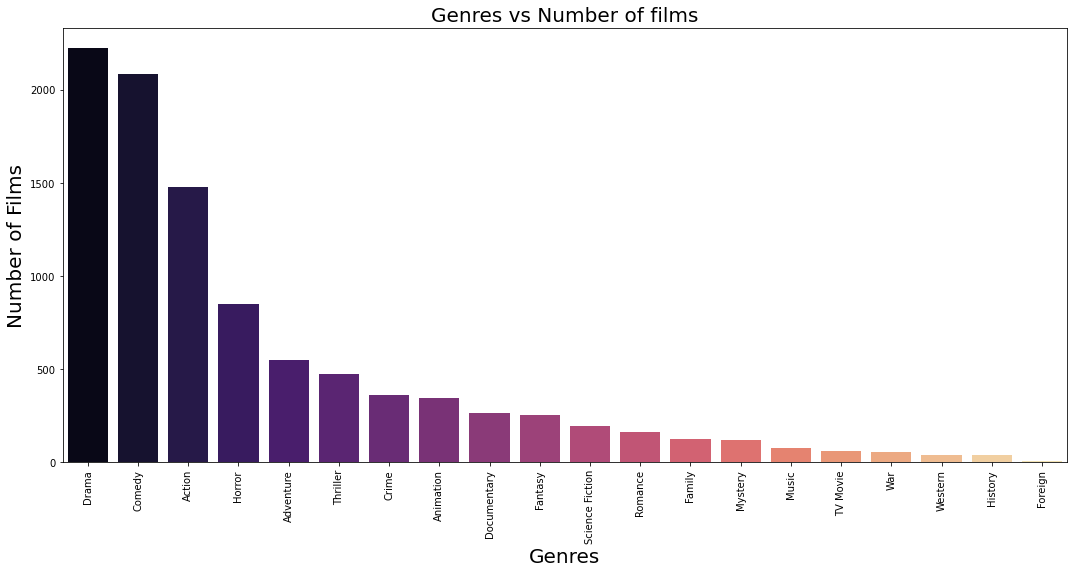

In [25]:
plt.figure(figsize=(18,8))
sns.barplot(x= df_genre_imdb.index.tolist(), y= df_genre_imdb.tolist(), palette='magma')
plt.xticks(rotation = 90)
plt.title('Genres vs Number of films',fontsize = 20)
plt.xlabel('Genres',fontsize = 20)
plt.ylabel('Number of Films',fontsize = 20);

The Dramatic films are the most directed films

### The highest film that achieved revenue?

In [26]:
df_revenve = df.groupby('original_title').sum()
revenue = df_revenve['revenue'].sort_values(ascending=False).head(8)
revenue

<ipython-input-26-dc1947353360>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_revenve = df.groupby('original_title').sum()


original_title
Avatar                                          2781505847
Star Wars: The Force Awakens                    2068178225
Titanic                                         1845034188
The Avengers                                    1568080742
Jurassic World                                  1513528810
Furious 7                                       1506249360
Avengers: Age of Ultron                         1405035767
Harry Potter and the Deathly Hallows: Part 2    1327817822
Name: revenue, dtype: int64

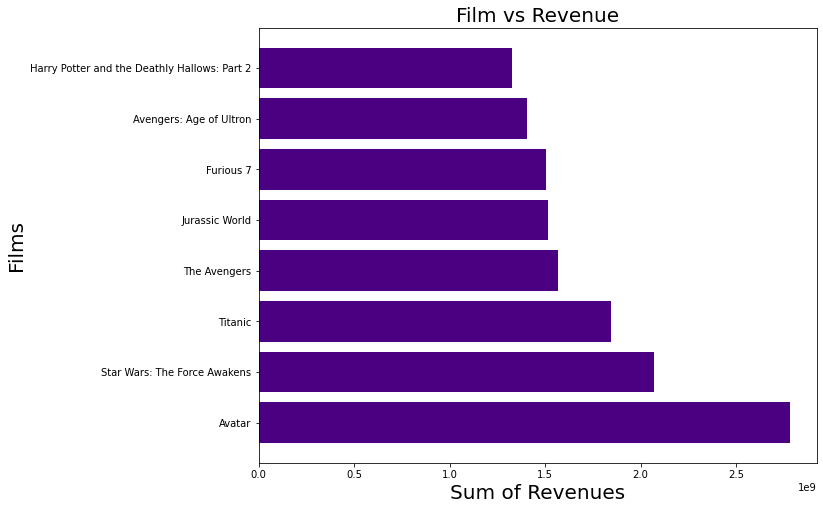

In [27]:
plt.figure(figsize=(10,8))
plt.barh(y= revenue.index.tolist(), width = revenue.tolist(), color = 'indigo')
plt.title('Film vs Revenue',fontsize = 20)
plt.xlabel('Sum of Revenues',fontsize = 20)
plt.ylabel('Films',fontsize = 20);

### Should a film that has a high budget achieve high revenue?

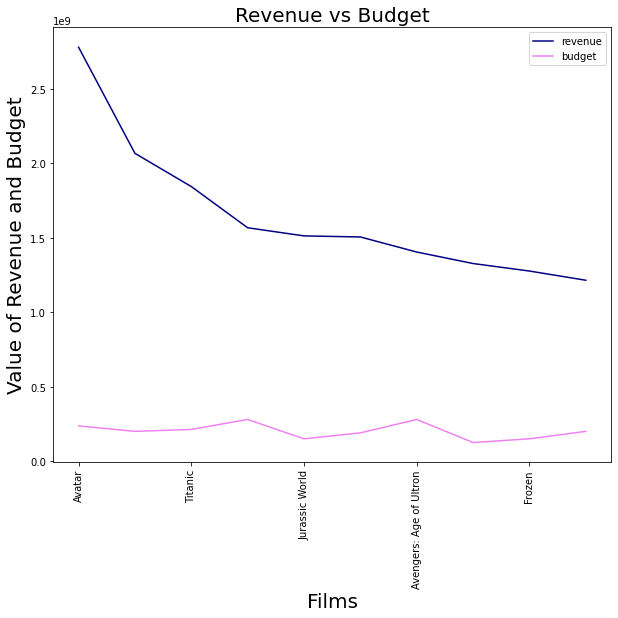

In [28]:
df_revenve[['revenue','budget']].sort_values(ascending=False, by='revenue').head(10).plot(figsize= (10,8), color = ['navy','violet'])
plt.xticks(rotation = 90)
plt.title('Revenue vs Budget',fontsize = 20)
plt.xlabel('Films',fontsize = 20)
plt.ylabel('Value of Revenue and Budget',fontsize = 20);

### What is the most company that produced films?

In [29]:
df_company = df.groupby('production_company').count()
company = df_company['imdb_id'].sort_values(ascending= False).head(11)

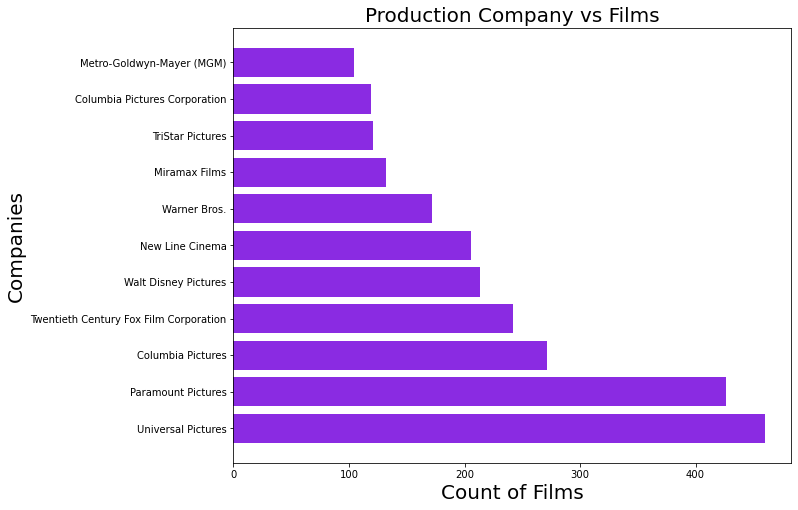

In [30]:
plt.figure(figsize=(10,8))
plt.barh(y= company.index.tolist(), width = company.tolist(), color = 'blueviolet')
plt.title('Production Company vs Films',fontsize = 20)
plt.xlabel('Count of Films',fontsize = 20)
plt.ylabel('Companies',fontsize = 20);

### What is the most cast that make films?

In [31]:
df_cast = df.groupby('cast').count()
cast = df_cast['imdb_id'].sort_values(ascending=False).head(12)


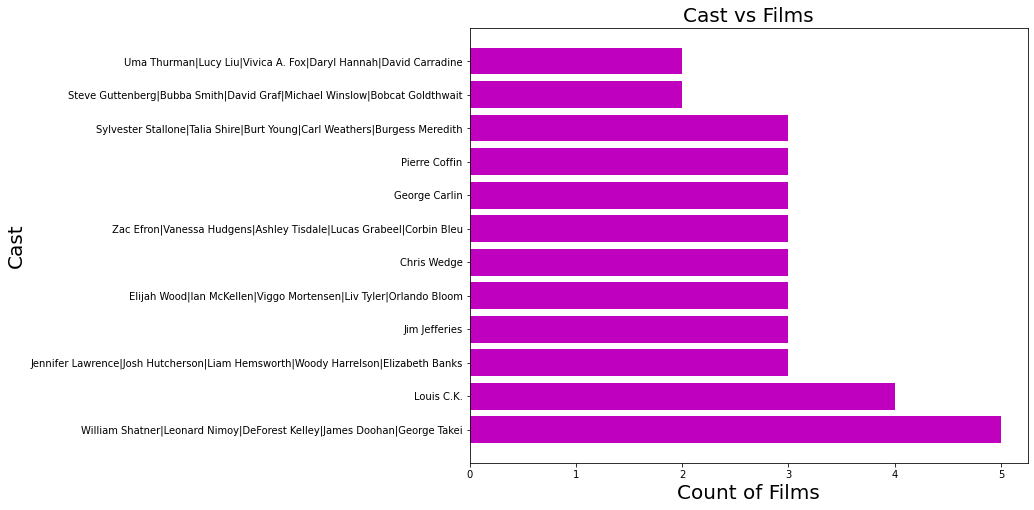

In [32]:
plt.figure(figsize=(10,8))
plt.barh(y= cast.index.tolist(), width = cast.tolist(), color = 'm')
plt.title('Cast vs Films',fontsize = 20)
plt.xlabel('Count of Films',fontsize = 20)
plt.ylabel('Cast',fontsize = 20);

### What is the most vote average?

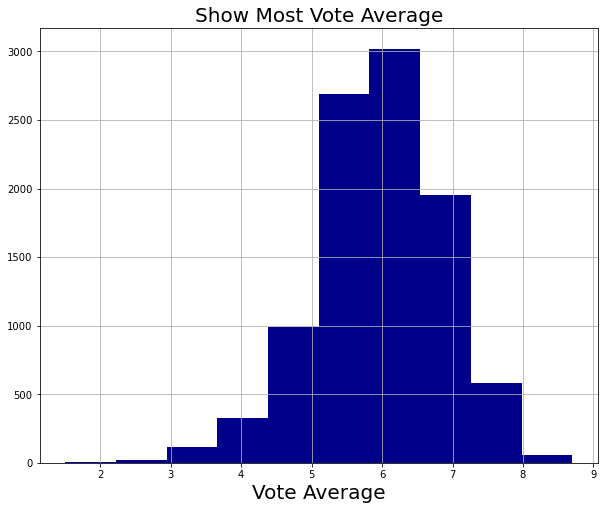

In [33]:
df['vote_average'].hist(color = 'darkblue', figsize=(10,8))
plt.title('Show Most Vote Average', fontsize = 20)
plt.xlabel('Vote Average', fontsize = 20);

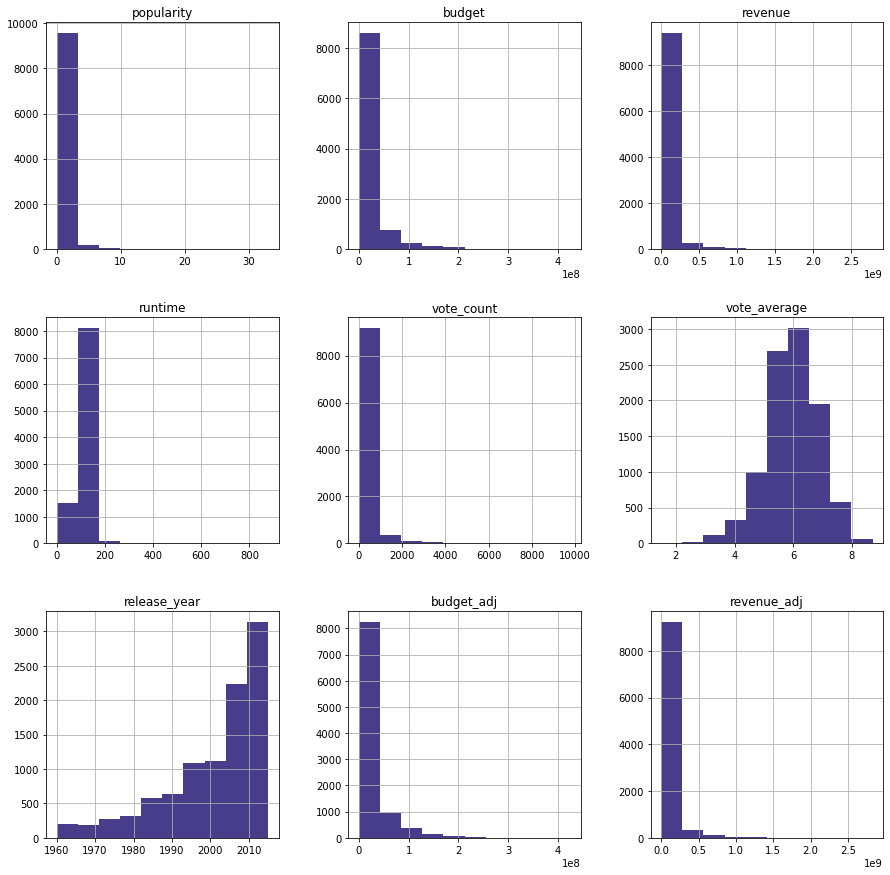

In [34]:
df.hist(figsize= (15,15), color= 'darkslateblue');

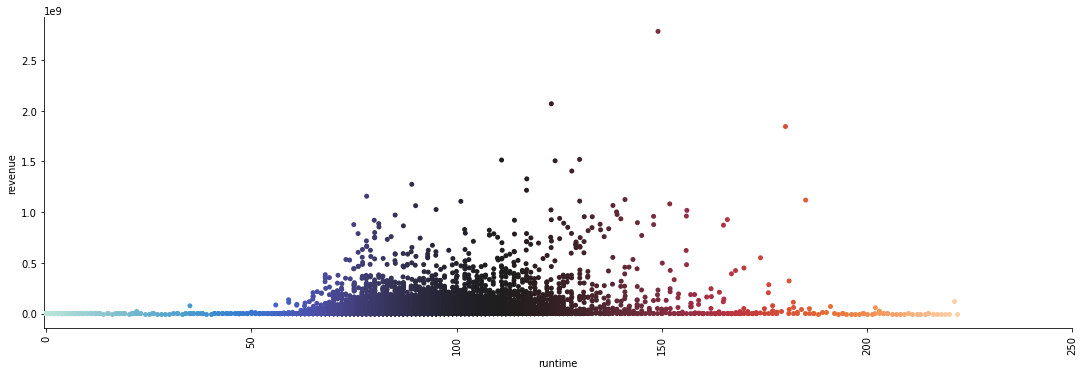

In [35]:
sns.catplot(x = 'runtime', y = 'revenue', data= df, height=5, aspect=3, palette = 'icefire');
plt.xticks(labels = np.arange(0,300,50), ticks= np.arange(0,300,50),rotation = 90);

This figure Show that there are Films its runtime of fewer than 60 minutes and more than 150 minutes and most are outliers,
I concluded that Films that have long runtime have high revenue 